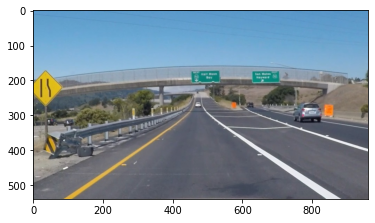

In [104]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread("exit-ramp.jpg")
plt.imshow(image)

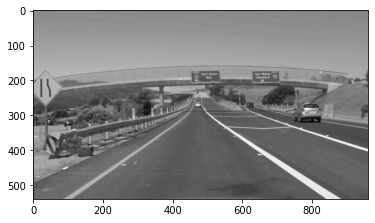

In [105]:
import cv2
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

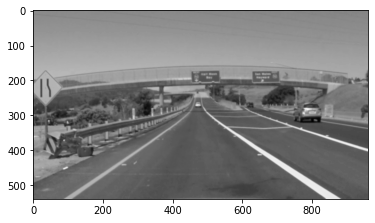

In [106]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap='gray')

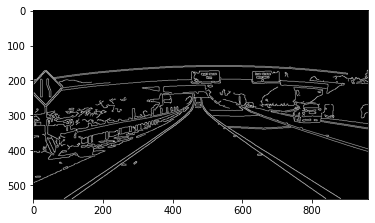

In [107]:
edge = cv2.Canny(blur_gray, 50, 150)
plt.imshow(edge, cmap = 'Greys_r')

In [108]:
#creating a mask
mask = np.zeros_like(edge)
ignore_mask_color = 255

In [109]:
# defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(50, imshape[0]), (420, 300), (500, 300), (imshape[1], imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edge, mask)

In [110]:
import numpy as np
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
line_gap = 5
line_image = np.copy(image)*0

In [111]:

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, line_gap)

In [112]:
for line in lines :
  for x1, y1, x2, y2 in line :
    cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

In [113]:
color_edges = np.dstack((edge, edge, edge))

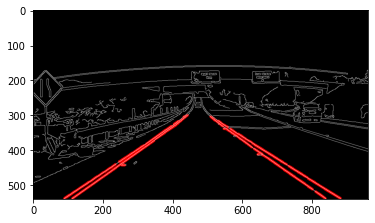

In [114]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
plt.imshow(combo)